# Example 6-1

Principal component analysis of the scikit-learn digits dataset (a subset of
the MNIST dataset)

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
# Load the data
digits_data = datasets.load_digits()
n = len(digits_data.images)

In [3]:
# Each image is represented as an 8-by-8 array. 
# Flatten this array as input to PCA.
image_data = digits_data.images.reshape((n, -1))
image_data.shape

(1797, 64)

In [4]:
# Groundtruth label of the number appearing in each image
labels = digits_data.target
labels

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
# Fit a PCA transformer to the dataset.
# The number of components is automatically chosen to account for 
# at least 80% of the total variance.
pca_transformer = PCA(n_components=0.8)
pca_images = pca_transformer.fit_transform(image_data)
pca_transformer.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [6]:
pca_transformer.explained_variance_ratio_[:3].sum()

0.4030395858767509

In [7]:
# Visualize the results
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

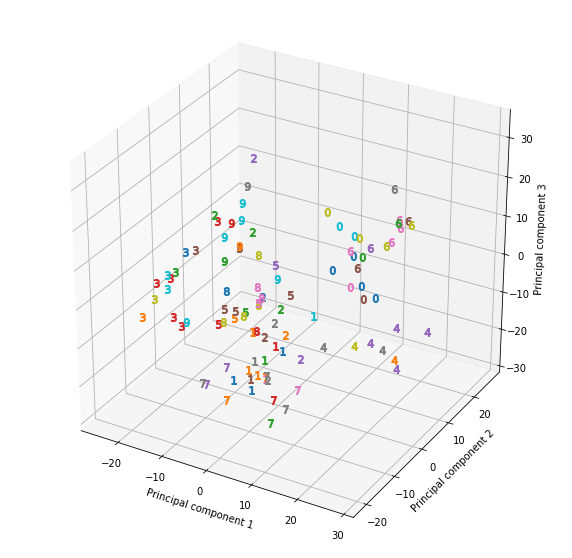

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(100):
    ax.scatter(pca_images[i, 0], 
               pca_images[i, 1], 
               pca_images[i, 2], 
               marker=r'${}$'.format(labels[i]), s=64)
    
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')

plt.show()